# **Step 1:** Installation of RetinaNet and PyTesseract

In [ ]:
# Restart runtime after this cell execution
!pip uninstall keras -y
!pip uninstall keras-nightly -y
!pip uninstall keras-Preprocessing -y
!pip uninstall keras-vis -y
!pip uninstall tensorflow -y

!pip install tensorflow==2.3.0
!pip install keras==2.4
!pip install pytesseract
!sudo apt install tesseract-ocr

# !which tesseract
# pytesseract.pytesseract.tesseract_cmd = (
#     r'/usr/bin/tesseract'
# )


In [ ]:
# clone the retina net repository
! git clone https://github.com/fizyr/keras-retinanet

In [ ]:
# Navigate to retina net repository
!cd ~
%cd keras-retinanet
! git checkout 42068ef9e406602d92a1afe2ee7d470f7e9860df
! python setup.py install
! python setup.py build_ext --inplace

In [ ]:
# Install using pip
! pip install .

In [ ]:
# Compile Cuthon code
# ! python setup.py build_ext --inplace

# **Step 2:** Run test

In [ ]:
%ls

In [ ]:
%cd GitHub/Product2/keras-retinanet/snapshots/

In [ ]:
%cd ~
%cd /Product2/keras-retinanet/snapshots/

In [ ]:
# Download this file from github https://github.com/fizyr/keras-retinanet/releases/download/0.5.1/resnet50_coco_best_v2.1.0.h5
# and put it into the keras-retinanet/snapshots
! wget https://github.com/fizyr/keras-retinanet/releases/download/0.5.1/resnet50_coco_best_v2.1.0.h5

In [ ]:
%ls

In [ ]:
%cd keras-retinanet

In [1]:
# show images inline
%matplotlib inline

# automatically reload modules when they have changed
%load_ext autoreload
%autoreload 2

# import keras
import tensorflow
from tensorflow import keras
from tensorflow.keras import models

# import keras_retinanet
from keras_retinanet import models
from keras_retinanet.utils.image import read_image_bgr, preprocess_image, resize_image
from keras_retinanet.utils.visualization import draw_box, draw_caption
from keras_retinanet.utils.colors import label_color
from keras_retinanet.utils.gpu import setup_gpu

# import miscellaneous modules
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
import pandas as pd
import time

In [ ]:
# ! pip install h5py==2.9.0

In [ ]:
%cd Product2

In [2]:
%ls

keras-retinanet/  PriceTagRecognitionModel.ipynb  pricetagrecognitionmodel.py


In [ ]:
# adjust this to point to your downloaded/trained model
# models can be downloaded here: https://github.com/fizyr/keras-retinanet/releases
model_path = os.path.join('snapshots', 'resnet50_coco_best_v2.1.0.h5')

# load retinanet model
model = models.load_model(model_path, backbone_name='resnet50')

# if the model is not converted to an inference model, use the line below
# see: https://github.com/fizyr/keras-retinanet#converting-a-training-model-to-inference-model
#model = models.convert_model(model)

print(model.summary())

# load label to names mapping for visualization purposes
labels_to_names = {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 
                   4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 
                   8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 
                   11: 'stop sign', 12: 'parking meter', 13: 'bench', 
                   14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 
                   18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 
                   22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 
                   26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 
                   30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 
                   34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 
                   37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 
                   41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 
                   46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 
                   50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 
                   54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 
                   59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop', 
                   64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell phone', 
                   68: 'microwave', 69: 'oven', 70: 'toaster', 71: 'sink', 
                   72: 'refrigerator', 73: 'book', 74: 'clock', 75: 'vase', 
                   76: 'scissors', 77: 'teddy bear', 78: 'hair drier', 79: 'toothbrush'}

In [ ]:
%%time
# load image
image = read_image_bgr('examples/000000008021.jpg')

# copy to draw on
draw = image.copy()
draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)

# preprocess image for network
image = preprocess_image(image)
image, scale = resize_image(image)

# process image
start = time.time()
boxes, scores, labels = model.predict_on_batch(np.expand_dims(image, axis=0))
print("processing time: ", time.time() - start)

# correct for image scale
boxes /= scale

# visualize detections
for box, score, label in zip(boxes[0], scores[0], labels[0]):
    # scores are sorted so we can break
    if score < 0.5:
        break
        
    color = label_color(label)
    
    b = box.astype(int)
    draw_box(draw, b, color=color)
    
    caption = "{} {:.3f}".format(labels_to_names[label], score)
    draw_caption(draw, b, caption)
    
plt.figure(figsize=(15, 15))
plt.axis('off')
plt.imshow(draw)
plt.show()

# **Step 3:** Load our models

## **Import all necessary packages**

In [5]:
# show images inline
%matplotlib inline

# automatically reload modules when they have changed
%load_ext autoreload
%autoreload 2

# import keras
import tensorflow
from tensorflow import keras
from tensorflow.keras import models

# import keras_retinanet
from keras_retinanet import models
from keras_retinanet.utils.image import read_image_bgr, preprocess_image, resize_image
from keras_retinanet.utils.visualization import draw_box, draw_caption
from keras_retinanet.utils.colors import label_color
from keras_retinanet.utils.gpu import setup_gpu

# import miscellaneous modules
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
import pandas as pd
import time
import math
import albumentations as A
import pytesseract

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## **Mount drive and define pathes for models weights**

In [3]:
%cd keras-retinanet

/home/fantast/Documents/GitHub/Product2/keras-retinanet


In [4]:
model_path_1 = 'weights/resnet50_csv_10.h5'
model_path_2 = 'weights/resnet50_csv_20.h5'

## **Define all fucntions**

In [6]:
def load_model_weights(model_path_1):
    # Load weights for first model price tag recognition
    model_1 = models.load_model(model_path_1, backbone_name='resnet50')
    model_1 = models.convert_model(model_1)

    # Load weights for first model price tag recognition


    return model_1

In [7]:
def model_tag_recognition(image):
    # Copy of image to crop
    crop = image.copy()
    crop = cv2.cvtColor(crop, cv2.COLOR_BGR2RGB)

    # preprocess image for network
    image = preprocess_image(image)
    image, scale = resize_image(image)

    # process image
    boxes, scores, labels = model_1.predict_on_batch(np.expand_dims(image, axis=0))

    # correct for image scale
    boxes /= scale

    # take our box
    box, score, label = boxes[0][0], scores[0][0], labels[0][0]

    # Make int coordinates
    b = box.astype(int)

    image_croped = crop[b[1]:b[3], b[0]:b[2]]
    image_croped = cv2.cvtColor(image_croped, cv2.COLOR_BGR2RGB)

    return image_croped

In [8]:
# Rotation functions
def rotate_image(image, angle):
    image_center = tuple(np.array(image.shape[1::-1]) / 2)
    rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
    result = cv2.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv2.INTER_LINEAR)
    return result

def compute_skew(src_img):

    if len(src_img.shape) == 3:
        h, w, _ = src_img.shape
    elif len(src_img.shape) == 2:
        h, w = src_img.shape
    else:
        print('upsupported image type')

    img = cv2.medianBlur(src_img, 3)

    edges = cv2.Canny(img,  threshold1 = 30,  threshold2 = 100, apertureSize = 3, L2gradient = True)
    lines = cv2.HoughLinesP(edges, 1, math.pi/180, 30, minLineLength=w / 4.0, maxLineGap=h/4.0)
    angle = 0.0
    nlines = lines.size

    #print(nlines)
    cnt = 0
    for x1, y1, x2, y2 in lines[0]:
        ang = np.arctan2(y2 - y1, x2 - x1)
        #print(ang)
        if math.fabs(ang) <= 30: # excluding extreme rotations
            angle += ang
            cnt += 1

    if cnt == 0:
        return 0.0
    return (angle / cnt)*180/math.pi

def deskew(src_img):
    return rotate_image(src_img, compute_skew(src_img))

In [9]:
# Function to crop price_id, price_lei and price_bani from price_tag
def model_elements_of_price_tag(image):
    # Prepare test images to crop from 
    crop = image.copy()
    crop = cv2.cvtColor(crop, cv2.COLOR_BGR2RGB)

    # Define a dataframe  coordinates
    df = pd.DataFrame(columns = ['class_id','score','x_min','x_max','y_min','y_max'])

    # # preprocess image for network
    # image = preprocess_image(image)
    # image, scale = resize_image(image)

    # process image
    boxes, scores, labels = model_2.predict_on_batch(np.expand_dims(image, axis=0))
  
  # # correct for image scale
  # boxes /= scale
  
    for box, score, label in zip(boxes[0], scores[0], labels[0]):
        # scores are sorted so we can break
        if score < 0.3:
            break

        # Make coordinates as int type
        b = box.astype(int)

        df = df.append({'class_id':label,
                'score':score,
                'x_min':b[1],
                'x_max':b[3],
                'y_min':b[0],
                'y_max':b[2]}, ignore_index=True)


    # Calculate best bounding box coordinates for each class ={1,2,3}
    # Class 1 - product_id
    class_1_best_score = df[df.class_id == 1].score.max()
    class_1_x_min = int(df[(df.class_id == 1)&(df.score == class_1_best_score)].x_min)
    class_1_y_min = int(df[(df.class_id == 1)&(df.score == class_1_best_score)].y_min)
    class_1_x_max = int(df[(df.class_id == 1)&(df.score == class_1_best_score)].x_max)
    class_1_y_max = int(df[(df.class_id == 1)&(df.score == class_1_best_score)].y_max)

    # Class 2 - price_lei
    class_2_best_score = df[df.class_id == 2].score.max()
    class_2_x_min = int(df[(df.class_id == 2)&(df.score == class_2_best_score)].x_min)
    class_2_y_min = int(df[(df.class_id == 2)&(df.score == class_2_best_score)].y_min)
    class_2_x_max = int(df[(df.class_id == 2)&(df.score == class_2_best_score)].x_max)
    class_2_y_max = int(df[(df.class_id == 2)&(df.score == class_2_best_score)].y_max)

    # Class 3 - price_bani
    class_3_best_score = df[df.class_id == 3].score.max()
    class_3_x_min = int(df[(df.class_id == 3)&(df.score == class_3_best_score)].x_min)
    class_3_y_min = int(df[(df.class_id == 3)&(df.score == class_3_best_score)].y_min)
    class_3_x_max = int(df[(df.class_id == 3)&(df.score == class_3_best_score)].x_max)
    class_3_y_max = int(df[(df.class_id == 3)&(df.score == class_3_best_score)].y_max)

    crop_id = crop[class_1_x_min:class_1_x_max, class_1_y_min:class_1_y_max]
    crop_lei = crop[class_2_x_min:class_2_x_max, class_2_y_min:class_2_y_max]
    crop_bani = crop[class_3_x_min:class_3_x_max, class_3_y_min:class_3_y_max]

    return crop_id, crop_lei, crop_bani


In [10]:
# Text from product_name
def text_from_name(image):
    img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    test_list = pytesseract.image_to_string(img_rgb).split('\n')


    # using join() + generator to remove special characters
    special_char = '@_!#$^&*()<>?/\|}{~:;.[]'
    out_list = [''.join(x for x in string if not x in special_char) for string in test_list]

    # trim spaces
    out_list = [elem.strip() for elem in out_list]

    # remove Null elements
    out_list = list(filter(None, out_list))

    return out_list[0]

In [11]:
# Text from croped_id
def text_from_id(image):  
    # Set config for tesseract
    config=' --psm 13 --oem 3 -c tessedit_char_whitelist=0123456789'

    img = cv2.resize(image, None, fx=1.2, fy=1.2, interpolation=cv2.INTER_CUBIC)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    kernel = np.ones((1, 1), np.uint8)
    img = cv2.dilate(img, kernel, iterations=1)
    img = cv2.erode(img, kernel, iterations=1)

    text_list = str(pytesseract.image_to_string(img, config=config).split('\n')[0])

    # using join() + generator to remove special characters
    special_char = '@_-!#$^&*()<>?/\|}{~:;.[]'
    out_list = [''.join(x for x in string if not x in special_char) for string in text_list]

    # trim spaces
    out_list = [elem.strip() for elem in out_list]

    # remove Null elements
    out_list = list(filter(None, out_list))

    out_list = ''.join(out_list)

    return out_list

In [12]:
# By default OpenCV stores images in BGR format and since pytesseract assumes RGB format,
# we need to convert from BGR to RGB format/mode:
def text_from_price_lei(image):

    img = cv2.resize(image, None, fx=1.5 , fy=1.5, interpolation=cv2.INTER_CUBIC)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    kernel = np.ones((1, 1), np.uint8)
    img = cv2.dilate(img, kernel, iterations=1)
    img = cv2.erode(img, kernel, iterations=1)
    img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

    config=' --psm 13 --oem 1 -c tessedit_char_whitelist=0123456789'
    text = pytesseract.image_to_string(img, config=config).split('\n')

    return text[0]

In [13]:
# By default OpenCV stores images in BGR format and since pytesseract assumes RGB format,
# we need to convert from BGR to RGB format/mode:
def text_from_price_bani(image):

    img = cv2.resize(image, None, fx=1.5 , fy=1.5, interpolation=cv2.INTER_CUBIC)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    kernel = np.ones((1, 1), np.uint8)
    img = cv2.dilate(img, kernel, iterations=1)
    img = cv2.erode(img, kernel, iterations=1)
    img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

    # Set config for tesseract
    config=' --psm 13 --oem 3 -c tessedit_char_whitelist=0123456789'
    text = str(pytesseract.image_to_string(img, config=config)).split('\n')[0]

    return text

In [14]:
def price_tag_detector(file):
    image_loaded = read_image_bgr(file)
    image_price_tag = model_tag_recognition(image_loaded)
    image_deskewed = deskew(image_price_tag)

    croped_id, croped_lei ,croped_bani = model_elements_of_price_tag(image_deskewed)

    text_name = text_from_name(image_deskewed)

    text_id = text_from_id(croped_id)

    text_lei = text_from_price_lei(croped_lei)

    text_bani = text_from_price_bani(croped_bani)

    return text_name, text_id, text_lei, text_bani

# **Step 4:** Test our models

In [15]:
%%time
model_1 = load_model_weights(model_path_1)
model_2 = load_model_weights(model_path_2)

Using TensorFlow backend.


CPU times: user 7.4 s, sys: 812 ms, total: 8.21 s
Wall time: 6.69 s


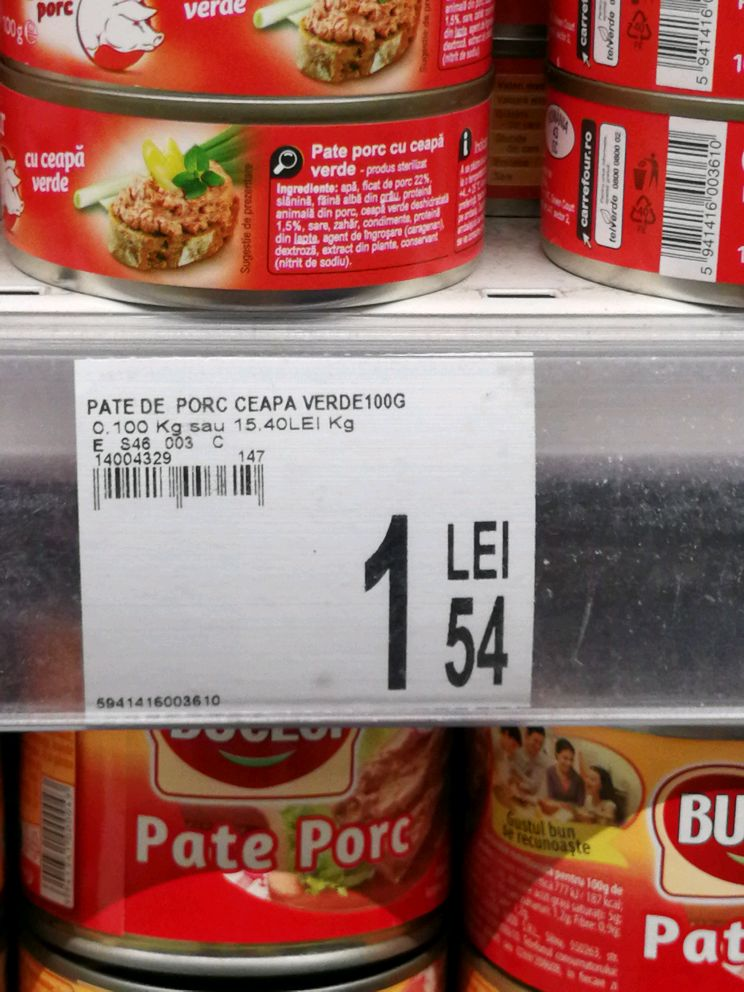

In [16]:
from IPython.display import Image
Image('test_images/Romania_foto_100.jpg')

In [17]:
%%time
file = 'test_images/Romania_foto_100.jpg'

df_text = pd.DataFrame(columns = ['File','Product_name','Product_ID','Price'])

text_name, text_id, text_lei, text_bani = price_tag_detector(file)

df_text = df_text.append({'File':file,
                          'Product_name':text_name,
                          'Product_ID':text_id,
                          'Price': text_lei + '.' + text_bani}, ignore_index=True)

df_text

CPU times: user 17.2 s, sys: 412 ms, total: 17.6 s
Wall time: 6.07 s


,File,Product_name,Product_ID,Price
0,test_images/Romania_foto_100.jpg,PATE DE PORC CEAPA VERDE100G,5041416008610,15.4


In [ ]:
df_text